Name : Abhinav A. Chaudhary

Roll no : 1016

  DL assignment2




In [24]:
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
import keras

In [25]:
#Loading and Preprocessing Data and normalizing the data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255


In [26]:
#Building the Neural Network Model
model=Sequential()
#A flatten layer to convert 2D input data (28x28 images) into a 1D array
model.add(keras.layers.Flatten(input_shape=(28,28)))
#A dense layer with 128 neurons and ReLU activation function
model.add(keras.layers.Dense(128,activation='relu'))
#Another dense layer with 10 neurons (for 10 classes) and softmax activation function
model.add(keras.layers.Dense(10,activation='softmax'))


In [27]:
x_train


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [28]:
#Model compilation is an activity performed after writing the statements in a model and before training starts. It checks for format errors, and defines the loss function, the optimizer or learning rate, and the metric
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [29]:
#here we are training the model
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6435 - accuracy: 0.8403 - val_loss: 0.3546 - val_accuracy: 0.9018
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3316 - accuracy: 0.9072 - val_loss: 0.2872 - val_accuracy: 0.9194
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2829 - accuracy: 0.9204 - val_loss: 0.2556 - val_accuracy: 0.9272
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2521 - accuracy: 0.9296 - val_loss: 0.2296 - val_accuracy: 0.9351
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2291 - accuracy: 0.9361 - val_loss: 0.2139 - val_accuracy: 0.9391


In [30]:
#evaluating the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Testing Loss= %.3f"%test_loss)
print("Testing Accuracy=%.3f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2139 - accuracy: 0.9391
Testing Loss= 0.214
Testing Accuracy=0.939


In [31]:
train_loss,train_acc=model.evaluate(x_train,y_train)
print("Training Loss= %.3f"%train_loss)
print("Training Accuracy=%.3f"%train_acc)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2164 - accuracy: 0.9395
Training Loss= 0.216
Training Accuracy=0.940


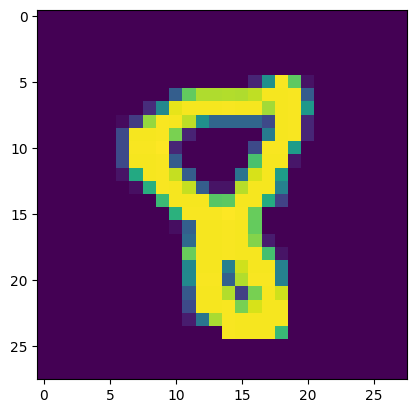

313/313 [==============================] - 1s 2ms/step
The handwritten number in the image is 8


In [32]:
#A random test image is selected, displayed using plt.imshow(), and the model predicts the digit in the image and prints it out.
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
prediction=model.predict(x_test)
print("The handwritten number in the image is %d"%np.argmax(prediction[n]))

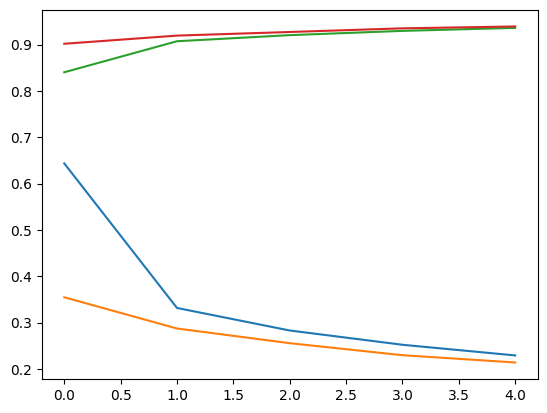

In [33]:
plt.plot(np.arange(0, 5), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), H.history["val_accuracy"], label="val_acc")
